## Knapsack problem

In [4]:
import random
from prettytable import PrettyTable
import numpy as np
import math 
import matplotlib.pyplot as plt

In [5]:

n_items = 20
area = 50

prices = [random.randint(1, area) for _ in range(n_items)]
weights = [random.randint(1, area) for _ in range(n_items)]

tbl = PrettyTable()
tbl.field_names = ["ID","Prices", "Weight"]

for i in range(n_items):
    tbl.add_row([i, prices[i], weights[i]])

tbl.add_row(["---","------", "------"])
tbl.add_row(["Suma", sum(prices), sum(weights)])
print(tbl)



+------+--------+--------+
|  ID  | Prices | Weight |
+------+--------+--------+
|  0   |   23   |   3    |
|  1   |   20   |   12   |
|  2   |   9    |   33   |
|  3   |   38   |   34   |
|  4   |   43   |   36   |
|  5   |   10   |   3    |
|  6   |   8    |   7    |
|  7   |   12   |   11   |
|  8   |   12   |   15   |
|  9   |   43   |   4    |
|  10  |   35   |   36   |
|  11  |   4    |   24   |
|  12  |   40   |   20   |
|  13  |   43   |   8    |
|  14  |   21   |   20   |
|  15  |   34   |   28   |
|  16  |   22   |   38   |
|  17  |   39   |   39   |
|  18  |   3    |   42   |
|  19  |   41   |   13   |
| ---  | ------ | ------ |
| Suma |  500   |  426   |
+------+--------+--------+


### Brute Force

In [6]:
def knapsack_brute_force(prices, weights, max_weight):
    n_products = len(prices)
    best_value = 0
    best_combination = []
    weights_of_b_comb = []
    history = []

    for i in range(2 ** n_products):
        combination = []
        total_weight = 0
        total_value = 0

        for j in range(n_products):
            if (i >> j) & 1:
                combination.append(j)
                total_weight += weights[j]
                total_value += prices[j]
                
        
        if total_weight <= max_weight and total_value > best_value:
            best_value = total_value
            best_combination = combination           
            weights_of_b_comb = weights
            history.append(best_value)
    return history, best_value, best_combination, weights_of_b_comb

history_bf, best_value, best_combination, weights_of_best_combination = knapsack_brute_force(prices, weights, 200)
print("Maximální hodnota:", best_value)
print("Nejlepší kombinace produktů:", best_combination)
print("Váhy nejlepších produktů:", weights_of_best_combination)
print(history_bf)


Maximální hodnota: 376
Nejlepší kombinace produktů: [0, 1, 3, 4, 5, 6, 7, 9, 12, 13, 14, 15, 19]
Váhy nejlepších produktů: [3, 12, 33, 34, 36, 3, 7, 11, 15, 4, 36, 24, 20, 8, 20, 28, 38, 39, 42, 13]
[23, 43, 52, 61, 81, 90, 95, 104, 124, 133, 134, 143, 151, 155, 163, 167, 175, 176, 177, 186, 194, 198, 206, 210, 218, 221, 229, 233, 241, 245, 253, 258, 261, 269, 273, 281, 284, 288, 291, 293, 301, 304, 312, 316, 319, 327, 328, 336, 337, 341, 345, 348, 356, 360, 365, 369, 370, 376]


### Simulated annealing

In [7]:
def generate_starting_vector(weights, max_weight):
    starting_vector = []
    total_weight = 0
    n_items = len(weights)

    for i in range(n_items*2):
        index = random.randint(0, n_items - 1)  # Vyber náhodný index produktu
        if index not in starting_vector:
            new_weight = total_weight + weights[index]
            if new_weight <= max_weight:
                starting_vector.append(index)
                total_weight = new_weight
    return starting_vector

def count_total_price(current_solution):
    total_price = 0
    for index in current_solution:
        total_price += prices[index]
    return total_price

def count_total_weight(current_solution):
    total_weight = 0
    for index in current_solution:
        total_weight += weights[index]
    return total_weight

def generate_neighbors(current_solution, n_neighbours, prices, max_weight):
    neighbours = []
    neighbour = []
    n_items= len(prices)
    total_weight = count_total_weight(current_solution) # 20

    while len(neighbours) < n_neighbours:
        neighbour = current_solution.copy()
        index = random.randint(0, n_items - 1)  # Vyber náhodný index produktu
        if index not in neighbour:
                new_weight = total_weight + weights[index] # 24
                if new_weight <= max_weight:
                    neighbour.append(index)
                    neighbours.append(neighbour)
        elif index in neighbour: #pokud je index v reseni
                neighbour.remove(index)
                neighbours.append(neighbour)
    return neighbours


def knapsack_simulated_annealing(n_iterations, max_weight, prices, weights, n_neighbours, max_temp, min_temp, cooling_decr):
    starting_vector = generate_starting_vector(weights, max_weight)
    current_solution = starting_vector #indexes of products
    best_combination = []
    total_price = count_total_price(current_solution)
    history = []

    current_fitness = total_price
    best_fitness = current_fitness
    history.append(current_fitness)
    T = max_temp

    for i in range(n_iterations):
        neighbours = generate_neighbors(current_solution, n_neighbours, prices, max_weight)

        for neighbour_solution in neighbours:
            neighbour_fitness = count_total_price(neighbour_solution) 
            delta_f = current_fitness - neighbour_fitness

            if(delta_f < 0):
                current_fitness = neighbour_fitness
                current_solution = neighbour_solution

            if(current_fitness > best_fitness):
                best_fitness = current_fitness
                best_combination = current_solution
                history.append(best_fitness) 

            elif(random.random() < math.exp(-delta_f/T)): #volani metropolise            
                current_fitness = neighbour_fitness
                current_solution = neighbour_solution
                
        T = max_temp*cooling_decr**i
        if(T < min_temp):
            T = min_temp
    return history, best_combination, best_fitness



### Výsledky

In [8]:
def comparison(n_iterations, max_weight, n_neighbours, cooling_decr ):
    max_temp = 1000
    min_temp = 0.1

    BF_history = []
    SA_history = []
    all_results_sa = []
    all_results_bf = []

    for i in range(30):
        KS_BF_history, best_fitness_bf, best_combination, weights_of_best_combination = knapsack_brute_force(prices, weights, max_weight)
        BF_history.append(best_fitness_bf)
        all_results_bf.append(KS_BF_history)
        KS_SA_history, best_solution_sa, best_fitness_sa = knapsack_simulated_annealing(n_iterations, max_weight, prices, weights, n_neighbours, max_temp, min_temp, cooling_decr)
        SA_history.append(best_fitness_sa)
        all_results_sa.append(KS_SA_history)


    BF_min = np.min(np.array(BF_history))
    BF_max = np.max(np.array(BF_history))
    BF_mean = np.mean(np.array(BF_history))
    BF_median = np.median(np.array(BF_history))
    BF_std_dev = np.std(np.array(BF_history))

    SA_min = np.min(np.array(SA_history))
    SA_max = np.max(np.array(SA_history))
    SA_mean = np.mean(np.array(SA_history))
    SA_median = np.median(np.array(SA_history))
    SA_std_dev = np.std(np.array(SA_history))

    tbl = PrettyTable()
    tbl.field_names = ["Algorithm", "MIN", "MAX", "MEAN", "MEDIAN", "STD_DEV"]
    tbl.add_row(["BF", BF_min, BF_max, BF_mean, BF_median, BF_std_dev])
    tbl.add_row(["SA", SA_min, SA_max, SA_mean, SA_median, SA_std_dev])
    print(tbl)

    '''
    # Vykreslení grafu pro každý běh SA hledání nejlepšího řešení
    plt.figure(figsize=(5, 2))
    plt.title("Simulated annealing history")
    for i in range(len(all_results_sa)):
        plt.plot(all_results_sa[i])

    plt.xlabel('Index')
    plt.ylabel('Hodnota')
    plt.show()
    '''

    plt.figure(figsize=(5, 2))
    plt.plot(BF_history) #  plt.plot(iteration_data, label=f"It {i+1}") 
    plt.plot(SA_history) #  plt.plot(iteration_data, label=f"It {i+1}")
    plt.xlabel("Iteration")
    plt.ylabel("Best Fitness")
    plt.title(" SA and BF best results comparison")
    plt.grid(True)
    plt.show()

+-----------+-----+-----+-------+--------+--------------------+
| Algorithm | MIN | MAX |  MEAN | MEDIAN |      STD_DEV       |
+-----------+-----+-----+-------+--------+--------------------+
|     BF    | 376 | 376 | 376.0 | 376.0  |        0.0         |
|     SA    | 279 | 369 | 331.6 | 333.5  | 24.100622398602077 |
+-----------+-----+-----+-------+--------+--------------------+


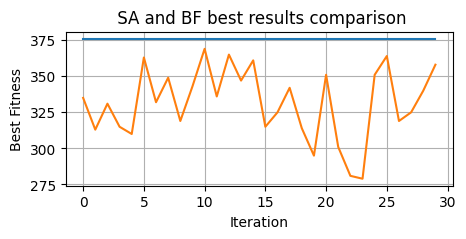

In [9]:
comparison(1000,200,10,0.6)
